The ML models for this project will be trained on the [Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database) gotten from [Kaggle](https://www.kaggle.com/). The dataset contains various columns of  predictors of Diabetes and a prediction value column, 'Outcome' with 1 for positive and 0 for negative. 

Disclaimer: This model is not a robust model and cannot be implemented in real life for the following reasons

1) The training dataset sample fails at being representative. For statistical tests to be valid, representative samples should be used as they yield insights that clearly depict the dynamics of the population

2) There is more room to improve the efficiency of the models by applying a better knowledge of feature selection and feature engineering in the medical domain.

3) The model focuses more on the female gender.

However, this implementation focuses on how supervised machine learning models can be used in the health industry.

# The Code

We start by importing libraries relevant to this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

reading the file into a pandas dataframe

In [2]:
df = pd.read_csv(r'C:\Users\Tobi\Desktop\coding\diabetes.csv')

It is a good practice to always check the first few rows of the dataset and the data-types of each column inorder to have an insight of what the dataset contains.

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains 9 columns and 768 rows

## Data Cleaning
In data science, major challenges usually emanate inconsistency and invalidity of entries. I start by checking for missing  and invalid entries 

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

It looks like we have no missing values in our dataset. This is a rare case and might be a pointer to invalid entries in our dataset as real world data are usually messier with missing values or invalid entries

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017C3DDB2D08>,
      dtype=object)

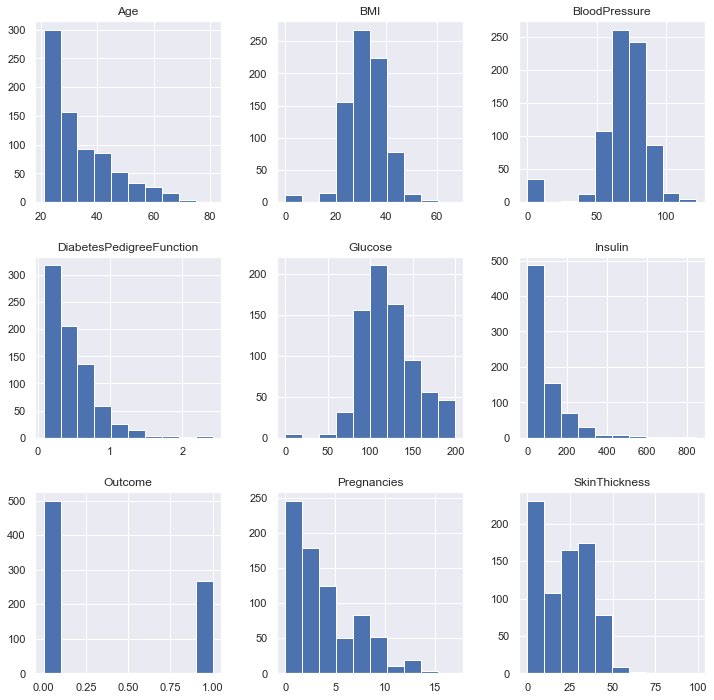

In [6]:
df.hist(figsize=(12,12))

In [7]:
cols = df.columns.to_list()
for col in cols:
    count = df.loc[df[col]==0].shape[0]
    print(col,':', count)

Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


From knowledge in the medical domain, we know that it's bizzare for Glucose level, blood pressure, skin thickness, insulin level, Body Mass Index(BMI), and age to have 0 as a value. These are pointers to invalid entries. There are various ways to fix this depending on context. Because our dataset has few records,discarding the rows with invalid 0 values will make us lose most of the records in our dataset. This isn't a model to be used in real life so we'll be replacing the 0 values in the selcted column with their respective mean values.

In [8]:
cols_to_change = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
for i in cols_to_change:
    df[i] = df[i].replace(0,df[i].mean())

Tip:  When you make chages to your dataset, check to see if the intended changes were effected

In [9]:
for col in cols:
    count = df.loc[df[col]==0].shape[0]
    print(col,':', count)

Pregnancies : 111
Glucose : 0
BloodPressure : 0
SkinThickness : 0
Insulin : 0
BMI : 0
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500


In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Our dataset looks cleaned and we can head on to explorative data analysis

## Explorative Data Analysis
This is useful for finding patterns and insights from our dataset that could help us approach problem solving better.

A pie Chart that shows the proportion of people at risk to those with no risk 

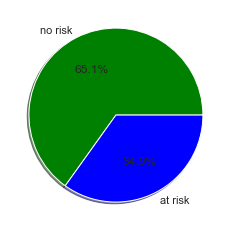

In [11]:
populations = [df.loc[df['Outcome']==0].shape[0],df.loc[df['Outcome']==1].shape[0]]
labels = ['no risk','at risk']
plt.pie(populations, labels=labels,autopct='%1.1f%%',shadow=True,colors=['green','blue'])
plt.savefig('Pie Chart.png')

Plotting the [PDF]() curves for the features indicating distributions for 'at risk' and 'no risk'

C:\Users\Tobi\Desktop\coding\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tobi\Desktop\coding\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Tobi\Desktop\coding\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  import sys


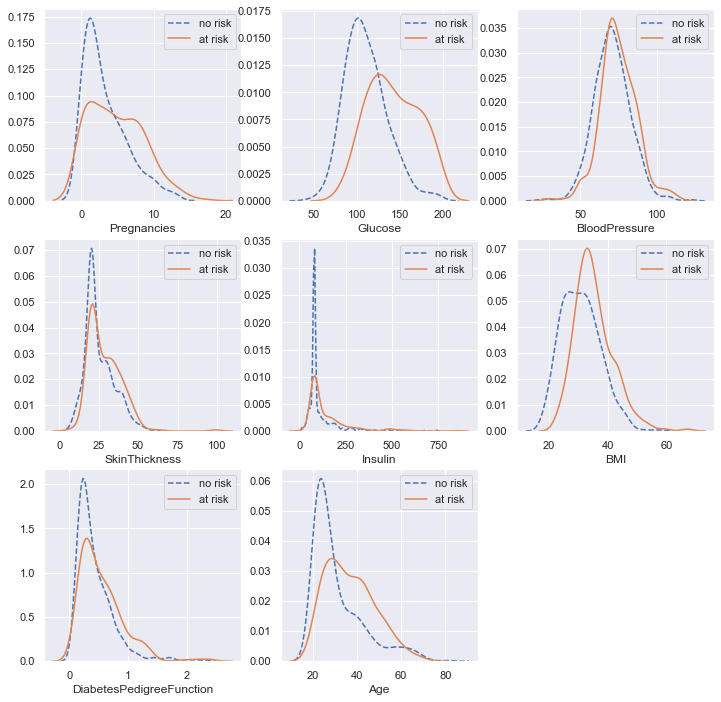

In [12]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
for i,col in enumerate(df.columns):
    ax = plt.subplot(3,3,i+1)
    sns.distplot(df.loc[df['Outcome']==0][col],hist=False,kde_kws={'linestyle':'--','label':'no risk'})
    sns.distplot(df.loc[df['Outcome']==1][col],hist=False,kde_kws={'linestyle':'-','label':'at risk'})
    
plt.subplot(3,3,9).set_visible(False)
plt.title('Probability Distribution for the different features')

plt.savefig('PDF Image2.png')

Plotting the [Box plot]() graph for the features indicating distributions for 'at risk' and 'no risk'

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


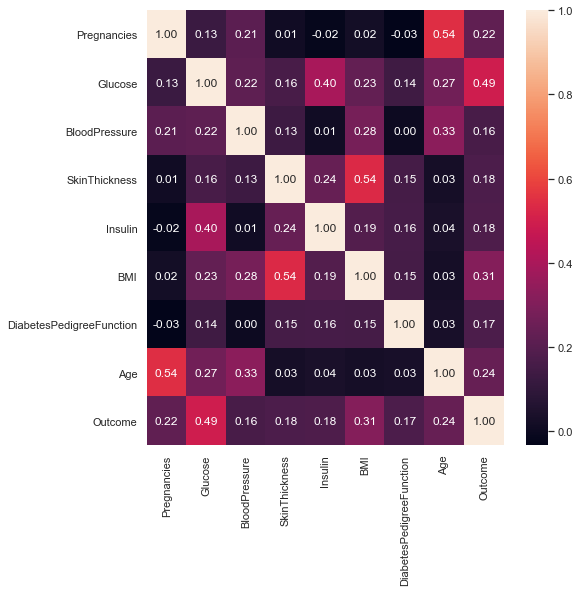

In [14]:
fig, ax = plt.subplots(figsize=(8,8))
ax = fig.gca()
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.savefig('Heatmap1.png')

C:\Users\Tobi\Desktop\coding\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


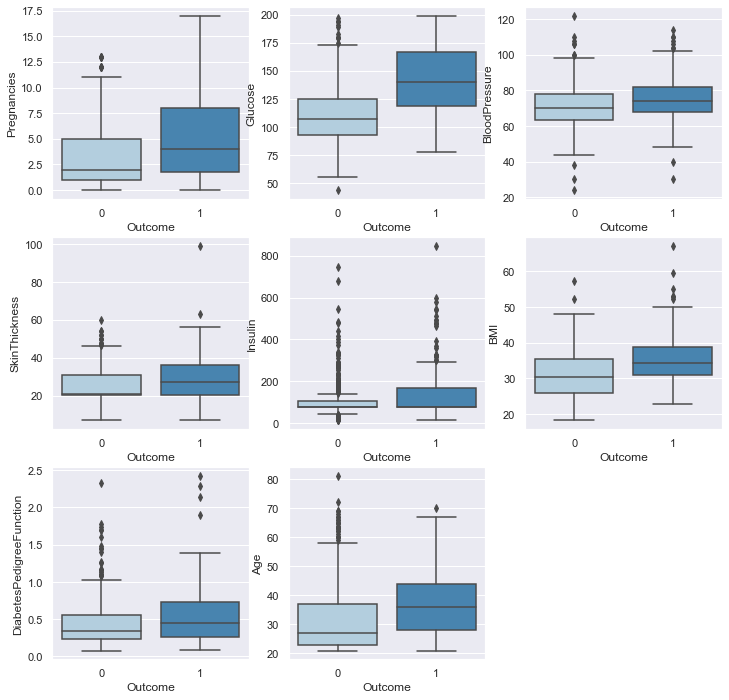

In [15]:
fig, ax = plt.subplots(3,3, figsize=(12,12))
for i,col in enumerate(df.columns):
    ax = plt.subplot(3,3,i+1)
    sns.boxplot(x = 'Outcome', y = col, data = df, palette ='Blues')
    
plt.subplot(3,3,9).set_visible(False)
plt.title('Boxplot Distribution for the different features')
plt.savefig('Boxplot.png',format = 'png')

### Inferences

From the correlation heatmap(see last column), it is observed that Glucose level, BMI, and Age are some of the best predictors of Diabetes

Patients with higher glucose levels are at more risk of being diabetic

Patients with greater Body Mass Indices are at more risk of being diabetic, this is a strong indicator of obesity as a good predictor of diabetes

Older patients are at more risk of being diabetic

#### Moving on to building the models

## Data Preprocessing

Before data preprocessing, i like to store a duplicate of the original dataset in a different dataframe.

In [16]:
df2 = df.copy()
X_cols = df2.columns[0:-1]
X_cols 

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [17]:
x = df2[X_cols]
Y = df2['Outcome']

In [18]:
scaler = StandardScaler()
scaler.fit(x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [19]:
scaled_x = scaler.transform(x)

In [20]:
x_scaled = pd.DataFrame(scaled_x, columns=X_cols)
x_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865276,-0.021044,0.872057,-0.417768,0.167255,0.468492,1.425995
1,-0.844885,-1.205989,-0.516583,0.248678,-0.417768,-0.851535,-0.365061,-0.190672
2,1.233880,2.015979,-0.681762,-0.630654,-0.417768,-1.331821,0.604397,-0.105584
3,-0.844885,-1.074480,-0.516583,-0.374700,-0.265107,-0.633222,-0.920763,-1.041549
4,-1.141852,0.503626,-2.663916,0.872057,0.530423,1.549899,5.484909,-0.020496


#### Importance of scaling features

Machine learning algorithms tend to place more importance on features with higher values, this often reduces the effect of important features like BMI with lower values, scaling helps to standardize the features and reduce them to the same scale with each feature having a mean of 0 and a standard deviation of 1.

#### Splitting the model into train and test data set

In [21]:
train_x,test_x,train_y,test_y = train_test_split(x_scaled,Y,test_size= 0.3, random_state = 42)

### Logistic Regression Model

Here, i will be using the sklearn library to create a logistic model, although i would normally suggest using the statsmodels library as it gives a very detailed overview of the model's outcome including details such as the constant term(bias), standard error, LL-Null, LLR p-value, Log-likelihood values etc but going into those details and what they represent could take a whole tutorial. 

In [22]:
model_1 = LogisticRegression(random_state = 42)
model_1.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Predicting and analysing the outcome of the model on the training dataset

In [23]:
confusion_matrix(train_y,model_1.predict(train_x))
confusion_table = pd.DataFrame(data =confusion_matrix(train_y,model_1.predict(train_x)), index=['Prone','Not Prone'], columns = ['Predicted Prone','Predicted Not Prone'])
confusion_table

,Predicted Prone,Predicted Not Prone
Prone,312,37
Not Prone,78,110


In [24]:
model_1.score(train_x,train_y)

0.7858472998137802

The model has an accuracy of 78% on the training dataset

#### Predicting and analysing the outcome of the model on the test dataset

In [25]:
predictions_1 = model_1.predict(test_x)

In [26]:
confusion_matrix_1 =  confusion_matrix(test_y,predictions_1)
confusion_table_1 = pd.DataFrame(data = confusion_matrix_1, index=['Prone','Not Prone'], columns = ['Predicted Prone','Predicted Not Prone'])
confusion_table_1

,Predicted Prone,Predicted Not Prone
Prone,124,27
Not Prone,33,47


In [27]:
array = np.array(confusion_matrix_1)
accuracy = ((array[0,0]+array[1,1])/array.sum())*100
accuracy

74.02597402597402

We could make use of an AUCROC curve to evaluate the perfomance of this model and also see what a good threshold is for determining if a patient should be classified as being prone to having diabetes.

In [28]:
y_probs_1 = model_1.predict_proba(test_x)
y_score_1 = y_probs_1[:,1]

In [29]:
FPR_1,TPR_1,Thresholds_1 = roc_curve(test_y,y_score_1)

Text(0, 0.5, 'TPR')

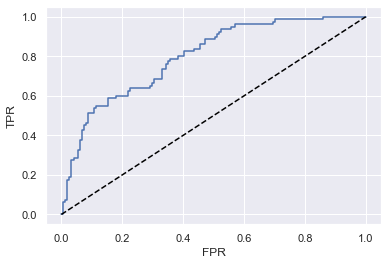

In [30]:
plt.plot(FPR_1,TPR_1)
plt.plot([0,1],[0,1],'--',color = 'black')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [31]:
roc_auc_score(test_y,y_score_1)

0.7975165562913907

The area under the curve is 0.8

### Random Forest Classifier

Here, i will be using the sklearn library to create a random forest classifier

In [32]:
model_2 = RandomForestClassifier()
model_2.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Predicting and analysing the outcome of the model on the training dataset

In [33]:
confusion_table_2_train = pd.DataFrame(data = confusion_matrix(train_y,model_2.predict(train_x)), index=['Prone','Not Prone'], columns = ['Predicted Prone','Predicted Not Prone'])
confusion_table_2_train

,Predicted Prone,Predicted Not Prone
Prone,349,0
Not Prone,0,188


In [34]:
model_2.score(train_x,train_y)

1.0

The random forest classifier model accurately fits the training dataset

#### Predicting and analysing the outcome of the model on the test dataset

In [35]:
predictions_2 = model_2.predict(test_x)

In [36]:
confusion_matrix_2 =  confusion_matrix(test_y,predictions_2)
confusion_table_2 = pd.DataFrame(data = confusion_matrix_2, index=['Prone','Not Prone'], columns = ['Predicted Prone','Predicted Not Prone'])
confusion_table_2

,Predicted Prone,Predicted Not Prone
Prone,121,30
Not Prone,27,53


In [37]:
array_2 = np.array(confusion_matrix_2)
accuracy_2 = ((array_2[0,0]+array_2[1,1])/array.sum())*100
accuracy_2

75.32467532467533

In [38]:
y_probs_2 = model_2.predict_proba(test_x)
y_score_2 = y_probs_2[:,1]

In [39]:
FPR_2,TPR_2,Thresholds_2 = roc_curve(test_y,y_score_2)

Text(0, 0.5, 'TPR')

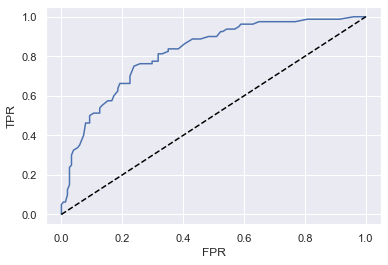

In [40]:
plt.plot(FPR_2,TPR_2)
plt.plot([0,1],[0,1],'--',color = 'black')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [41]:
roc_auc_score(test_y,y_score_2)

0.817591059602649

The area under the curve is 0.82, the Random Forest Classifier is only slightly better than the Logistic Regression model

### Deep Neural Networks using keras library

In [42]:
from keras.models import Sequential

Using TensorFlow backend.
C:\Users\Tobi\Desktop\coding\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Tobi\Desktop\coding\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Tobi\Desktop\coding\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Tobi\Desktop\coding\lib\site-packages\tensorflow\python\fra

In [43]:
model_3 = Sequential()
from keras.layers import Dense
model_3.add(Dense(16, activation='relu', input_dim=8))
model_3.add(Dense(16, activation='relu'))
model_3.add(Dense(1, activation='sigmoid'))
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


In [44]:
model_3.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [45]:
model_3.fit(train_x,train_y,epochs=200)


Epoch 1/200
537/537 [==============================] - 1s 1ms/step - loss: 0.6812 - accuracy: 0.5363
Epoch 2/200
537/537 [==============================] - 0s 164us/step - loss: 0.6331 - accuracy: 0.6201
Epoch 3/200
537/537 [==============================] - 0s 214us/step - loss: 0.5971 - accuracy: 0.6685
Epoch 4/200
537/537 [==============================] - 0s 223us/step - loss: 0.5674 - accuracy: 0.7020
Epoch 5/200
537/537 [==============================] - 0s 268us/step - loss: 0.5429 - accuracy: 0.7244
Epoch 6/200
537/537 [==============================] - 0s 210us/step - loss: 0.5221 - accuracy: 0.7412
Epoch 7/200
537/537 [==============================] - 0s 149us/step - loss: 0.5041 - accuracy: 0.7561
Epoch 8/200
537/537 [==============================] - 0s 198us/step - loss: 0.4897 - accuracy: 0.7672
Epoch 9/200
537/537 [==============================] - 0s 164us/step - loss: 0.4765 - accuracy: 0.7672
Epoch 10/200
537/537 [==============================] - ETA: 0s - loss: 0.

#### Predicting and analysing the outcome of the model on the training dataset

In [46]:
confusion_table = pd.DataFrame(data =confusion_matrix(train_y,model_3.predict_classes(train_x)), index=['Prone','Not Prone'], columns = ['Predicted Prone','Predicted Not Prone'])
confusion_table

,Predicted Prone,Predicted Not Prone
Prone,314,35
Not Prone,45,143


In [47]:
score1 = model_3.evaluate(train_x,train_y)
print('Accuracy on train dataset: %.2f' %(score1[1]*100))

537/537 [==============================] - 0s 387us/step
Accuracy on train dataset: 85.10


#### Predicting and analysing the outcome of the model on the test dataset

In [48]:
predictions_3 = model_3.predict_classes(test_x)

In [49]:
confusion_matrix_3 =  confusion_matrix(test_y,predictions_3)
confusion_table_3 = pd.DataFrame(data = confusion_matrix_3, index=['Prone','Not Prone'], columns = ['Predicted Prone','Predicted Not Prone'])
confusion_table_3

,Predicted Prone,Predicted Not Prone
Prone,121,30
Not Prone,31,49


In [50]:
array_3 = np.array(confusion_matrix_3)
accuracy_3 = ((array_3[0,0]+array_3[1,1])/array.sum())*100
accuracy_3

73.59307359307358

In [51]:
y_score_3 = model_3.predict(test_x)

Text(0, 0.5, 'TPR')

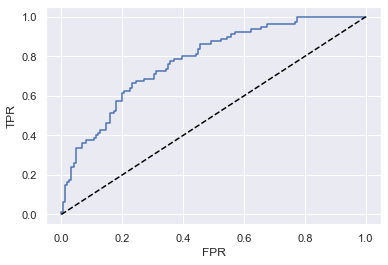

In [52]:
FPR,TPR,k = roc_curve(test_y,y_score_3)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color = 'black')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [53]:
roc_auc_score(test_y,y_score_3)

0.7795529801324503

The area under the curve is 0.78

### Conclusion

The Random Forest Classifier appears to have the highest area under the curve, however, tuning the hyper parameters of the deep neural network could lead to better model.
